In [0]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [24]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')

In [26]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22621,32345.0,-3.217543,2.453869,0.450088,3.513237,0.825452,-0.168211,1.091478,-0.582236,-0.186056,5.233060,1.394962,-0.334004,-0.434946,-0.467180,0.198247,-0.131642,-0.610047,0.097706,0.513841,0.562991,-0.413717,0.286534,-0.058481,0.314778,0.116800,0.176101,0.389827,0.431724,21.99,0
104600,69143.0,-0.406943,0.831631,1.256628,-0.289707,0.138075,-0.230055,0.445172,0.242225,-0.294753,-0.080739,0.332351,-0.687000,-2.000510,0.708785,0.424506,0.692018,-0.775515,0.620369,0.576474,-0.004264,-0.245794,-0.777911,-0.096702,-0.432796,-0.202810,0.103333,0.247399,0.099329,1.98,0
145146,86673.0,2.018030,0.009786,-3.297322,0.124509,3.077149,3.037360,0.198263,0.576737,-0.306622,0.383319,0.004943,0.167639,-0.296468,1.017590,0.605215,-0.481692,-0.523039,-0.537682,-0.514872,-0.168074,0.131174,0.328661,0.008102,0.701783,0.502561,-0.465627,-0.016813,-0.066460,24.95,0
218550,141358.0,-0.380117,1.238007,-0.513561,-0.087990,0.504921,-1.240428,0.768126,0.180734,-0.234398,-1.391447,-0.949320,-0.152040,-0.403038,-0.541576,0.085747,0.009295,0.848680,0.244838,0.393270,-0.186957,-0.143366,-0.468193,0.098314,-0.254031,-0.818392,-0.633546,0.110360,0.174744,14.90,0
53350,45933.0,0.849148,-0.735981,1.112526,1.023505,-1.499686,-0.553902,-0.469273,0.040541,0.945371,-0.220671,-0.534660,-0.161234,-1.033602,-0.026769,0.761051,0.305220,-0.145016,0.099104,-0.430276,0.162624,0.206314,0.324449,-0.150625,0.745499,0.208763,0.433101,-0.024956,0.055082,174.00,0


In [27]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 1.0, 'Heatmap of Correlation')

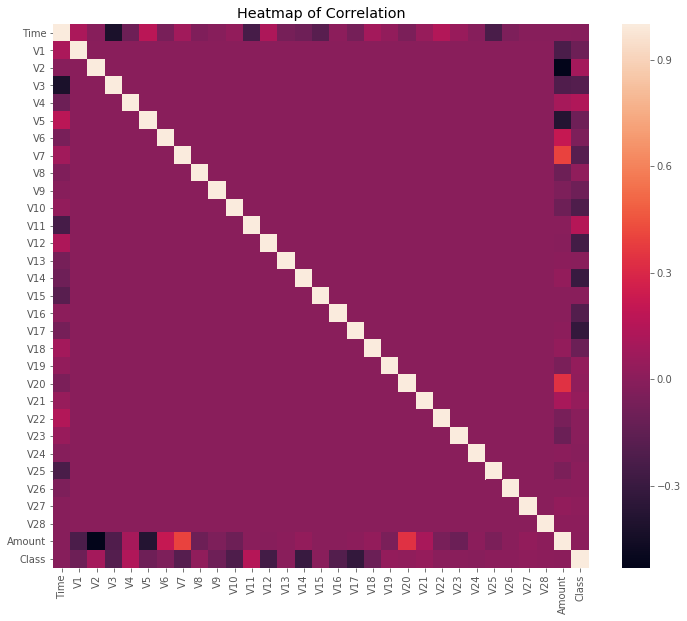

In [28]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [0]:
#SCaling Amount and Time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [0]:
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [0]:
#scaling amount
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [32]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256533, 31)
Test Shape: (28274, 31)


In [33]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
16543,27914.0,-3.488716,2.325194,0.354413,-1.921671,-0.734515,-0.505151,0.110472,0.549317,2.000181,2.650335,1.295927,-0.212179,-2.060787,-0.140675,0.462360,0.402611,-0.611631,-0.228099,-0.978725,0.851830,-0.386400,-0.244373,0.175060,-0.037683,-0.068035,0.682642,0.237155,-0.081652,5.76,0,-0.330200,-1.408772
143017,85069.0,-0.872164,1.481691,0.957481,2.679663,0.024672,0.197610,0.848322,0.435733,-2.284891,0.522969,0.574434,-0.377863,-0.918458,1.226556,0.395226,0.058154,0.035610,0.674261,1.362046,0.191193,0.162702,0.094506,-0.141232,-0.023842,0.469560,0.359177,-0.120230,0.003611,96.62,0,0.033066,-0.205207
191788,129410.0,1.699391,-0.678600,-2.375801,0.036742,1.301323,1.196816,0.335248,0.188588,0.109916,0.081803,0.787406,0.954201,-0.197853,0.713028,-0.297006,-1.042443,0.257290,-1.386590,-0.354668,0.021633,0.168419,0.405093,-0.061913,-0.871623,0.049040,0.673087,-0.088625,-0.074536,151.52,0,0.252561,0.728523
155388,105302.0,-0.423514,1.167313,-0.000601,-0.470357,1.309149,-0.486623,1.223480,-0.247685,0.617296,-0.530785,1.640169,-1.539943,1.966740,1.769468,-2.352605,-0.499306,0.246863,0.070556,0.131253,-0.033604,-0.049667,0.310078,-0.131336,0.767412,-0.155694,0.206872,0.193809,0.209516,1.00,0,-0.349231,0.220858
36406,38524.0,1.220495,-0.749312,0.328288,-0.488831,-1.204231,-0.962779,-0.364903,-0.276520,-0.850057,0.634303,-0.481008,0.044864,0.791893,-0.040810,0.895076,-1.243150,-0.089930,1.069883,-0.908373,-0.261893,-0.190993,-0.213397,-0.098821,0.463988,0.290940,1.148810,-0.067510,0.023430,97.28,0,0.035704,-1.185348


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
Time             284807 non-null float64
V1               284807 non-null float64
V2               284807 non-null float64
V3               284807 non-null float64
V4               284807 non-null float64
V5               284807 non-null float64
V6               284807 non-null float64
V7               284807 non-null float64
V8               284807 non-null float64
V9               284807 non-null float64
V10              284807 non-null float64
V11              284807 non-null float64
V12              284807 non-null float64
V13              284807 non-null float64
V14              284807 non-null float64
V15              284807 non-null float64
V16              284807 non-null float64
V17              284807 non-null float64
V18              284807 non-null float64
V19              284807 non-null float64
V20              284807 non-null float64
V21              284807 non-

In [35]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 444 fraudulent transactions in the train data.


In [0]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [0]:
#concatenating both into a subsample data set with equal class distribution
df.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [38]:
subsample = pd.concat([df, fraud])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
df = df.reset_index()

In [40]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample = subsample.drop('Time', axis=1)
subsample = subsample.drop('Amount', axis=1)
subsample.head(10)


,Class,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9,scaled_amount,scaled_time
0,0,-24.717179,1.437047,-0.626104,-0.005154,1.211044,-1.657643,1.605334,1.356467,-1.484121,-0.056169,3.477968,-29.700604,-11.753658,-4.410023,3.820005,22.083545,-0.098109,6.070850,1.461475,6.578849,-4.398798,-2.017586,7.015138,15.700555,-10.819584,-3.586669,-1.336900,3.279434,-0.209498,1.414485
1,0,-4.188698,-0.377735,1.607127,0.443841,-0.261183,-1.097480,0.089929,0.725947,0.151701,1.121352,-0.660603,-3.525622,0.645039,0.187981,-0.157169,0.237638,0.207630,0.857082,-0.464030,-0.667489,0.757097,1.374416,1.282584,4.712111,-3.480482,-1.548122,0.022618,-0.339929,-0.349231,-1.444781
2,0,-0.980268,0.359510,-0.943642,-0.279437,0.119181,0.087617,0.501797,-0.174129,-0.537017,-0.089652,0.216611,0.987278,-0.431331,0.368496,1.079668,-0.186961,-0.013289,-0.722594,0.652657,-0.750853,0.297508,-0.269034,-0.563926,0.247573,-0.932764,1.284290,-0.680383,0.084084,-0.033582,1.044202
3,0,-0.624636,-0.314070,0.725636,1.495600,-0.149037,-0.633973,-2.131714,-1.523069,0.945633,-0.658683,1.515678,0.528820,-0.025049,-0.216733,-0.203228,0.015198,0.233013,-0.446746,-0.480794,0.096466,0.163594,2.408148,1.592397,-0.317556,1.031873,-0.113511,0.442685,0.306778,-0.309290,-1.267516
4,0,-0.954528,1.068260,-1.269513,-0.827246,0.921245,-1.452775,-0.808834,-0.334500,0.296022,0.148673,-0.463926,-0.073169,-0.158365,-0.290017,-0.081177,-0.310824,0.025558,0.334932,-0.321640,-0.379951,-0.382398,2.416511,-2.453007,-1.406548,-0.052660,-0.641746,0.070884,-1.393976,-0.321245,-1.388725
5,0,1.271576,0.777024,0.512193,-1.224357,-1.695273,0.144485,0.955820,1.724878,-0.097857,-0.278388,0.467162,-1.047680,0.042005,0.405903,0.944278,-0.196660,-0.819558,0.350835,0.017268,0.028573,0.006045,0.558597,-0.936221,-1.089141,0.495688,-1.311593,0.379684,-0.297635,-0.153525,-0.953858
6,0,-0.652983,-0.023578,-1.621605,-0.691500,1.208111,-1.196171,0.287390,1.799704,-0.420749,-0.326038,0.458952,0.042109,-0.000895,1.210429,1.016975,-0.233625,0.078583,-0.105201,-0.067801,0.070093,0.163372,1.800669,-2.144517,-0.497611,0.823688,-0.993240,-0.550677,-0.292907,-0.313289,0.430069
7,0,1.000181,0.726616,1.293593,0.098575,-0.737814,0.115261,1.186261,-0.771243,-0.219763,1.865104,-1.420612,-1.245219,-0.337392,-0.000175,0.212786,0.013727,0.216419,-0.159565,0.697773,0.014002,0.038793,1.306584,-0.347242,-1.853100,0.233733,-1.345210,0.353485,-0.322480,0.126541,-0.527056
8,0,-0.050202,-0.375542,-0.894164,-0.204981,-0.377786,0.365634,0.331218,-0.611879,0.119048,-0.598877,1.086018,0.772183,-0.011112,-0.165785,-0.406858,0.062780,-0.009818,-0.823839,0.298492,0.137256,0.184688,0.608735,0.050254,0.416965,-0.844924,0.890778,-0.199986,-0.373848,-0.317287,1.363124
9,0,1.738391,0.473490,-0.382324,-0.102960,0.007730,-0.717491,-0.518215,0.777038,0.426848,-1.701220,0.727242,-2.047855,0.411209,0.071947,-0.110515,0.192859,0.717201,-0.426975,-0.366074,0.022803,-0.013052,-1.660041,-1.546029,0.837482,4.174862,-1.669262,1.078418,0.496235,0.446388,0.647134


In [0]:

X = df.drop('Class', axis=1)
y = df['Class']

In [0]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ynew = model.predict(X_train)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, ynew)

array([[227451,      0],
       [    23,    371]])

In [0]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = df[features]
y = df[target]

In [0]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [51]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.61      0.72       246

    accuracy                           1.00    142404
   macro avg       0.94      0.81      0.86    142404
weighted avg       1.00      1.00      1.00    142404



In [52]:
confusion_matrix(y_test, y_pred)

array([[142138,     20],
       [    95,    151]])